In [1]:
!pip install emoji

In [2]:
import re
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
import itertools
from collections import Counter
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')


C:\Users\Angela\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
f = open('Msc Unofficial.txt','r',encoding ='utf-8')

In [4]:
data = f.read()

In [5]:
print(data)

[03/08/2023, 01:23:34] Unofficial Group FYMSc 23-24: ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.
[03/08/2023, 01:23:34] ~ Aditi Sharma: ‎~ Aditi Sharma created this group
[17/08/2023, 10:05:18] Unofficial Group FYMSc 23-24: ‎Shaikh Shoaib DSBA added you
[17/08/2023, 10:05:24] Shaikh Shoaib DSBA: https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php
‎[17/08/2023, 10:08:34] Adnan Msc: ‎image omitted
‎[17/08/2023, 10:08:50] Adnan Msc: ‎image omitted
[17/08/2023, 14:51:28] Shaikh Shoaib DSBA: This is an assignment given by sharon maam. Make sure to complete it
[17/08/2023, 14:54:05] Adnan Msc: Aye sir
[17/08/2023, 14:54:31] Shaikh Shoaib DSBA: Jo log class m nhi the unkeliye inform krrha hu bhai
[17/08/2023, 14:54:32] Aakash Msc: Submission date ?
[17/08/2023, 14:54:40] Adnan Msc: Not given
‎[17/08/2023, 14:54:40] Shaikh Shoaib DSBA: ‎sticker omitted
[17/08/2023, 14:54:49]

In [6]:
pattern = r'\[\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}:\d{2}\]'

In [7]:
messages = re.split(pattern, data)
messages

['',
 ' Unofficial Group FYMSc 23-24: \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n',
 ' ~\u202fAditi Sharma: \u200e~\u202fAditi Sharma created this group\n',
 ' Unofficial Group FYMSc 23-24: \u200eShaikh Shoaib DSBA added you\n',
 ' Shaikh Shoaib DSBA: https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php\n\u200e',
 ' Adnan Msc: \u200eimage omitted\n\u200e',
 ' Adnan Msc: \u200eimage omitted\n',
 ' Shaikh Shoaib DSBA: This is an assignment given by sharon maam. Make sure to complete it\n',
 ' Adnan Msc: Aye sir\n',
 ' Shaikh Shoaib DSBA: Jo log class m nhi the unkeliye inform krrha hu bhai\n',
 ' Aakash Msc: Submission date ?\n',
 ' Adnan Msc: Not given\n\u200e',
 ' Shaikh Shoaib DSBA: \u200esticker omitted\n',
 ' Aakash Msc: Thank you!\n',
 ' Shaikh Shoaib DSBA: Not mentioned yet\n',
 ' Shaikh Shoaib DSBA: 🫂\n',
 ' Aakash Msc: Please post here the name, roll no 

In [8]:
dates = re.findall(pattern, data)
dates

['[03/08/2023, 01:23:34]',
 '[03/08/2023, 01:23:34]',
 '[17/08/2023, 10:05:18]',
 '[17/08/2023, 10:05:24]',
 '[17/08/2023, 10:08:34]',
 '[17/08/2023, 10:08:50]',
 '[17/08/2023, 14:51:28]',
 '[17/08/2023, 14:54:05]',
 '[17/08/2023, 14:54:31]',
 '[17/08/2023, 14:54:32]',
 '[17/08/2023, 14:54:40]',
 '[17/08/2023, 14:54:40]',
 '[17/08/2023, 14:54:49]',
 '[17/08/2023, 14:54:51]',
 '[17/08/2023, 14:54:56]',
 '[17/08/2023, 15:03:05]',
 '[17/08/2023, 15:03:14]',
 '[17/08/2023, 15:03:15]',
 '[17/08/2023, 15:03:20]',
 '[17/08/2023, 15:03:21]',
 '[17/08/2023, 15:03:27]',
 '[17/08/2023, 15:03:36]',
 '[17/08/2023, 15:05:00]',
 '[17/08/2023, 15:05:31]',
 '[17/08/2023, 15:06:21]',
 '[17/08/2023, 15:07:00]',
 '[17/08/2023, 15:17:12]',
 '[17/08/2023, 15:22:37]',
 '[17/08/2023, 15:47:35]',
 '[17/08/2023, 20:58:48]',
 '[17/08/2023, 20:59:02]',
 '[17/08/2023, 20:59:07]',
 '[17/08/2023, 20:59:24]',
 '[17/08/2023, 20:59:28]',
 '[17/08/2023, 20:59:48]',
 '[17/08/2023, 20:59:52]',
 '[17/08/2023, 21:00:06]',
 

In [9]:
import pandas as pd

# Assuming 'messages' and 'dates' are your lists containing user messages and message dates
# Padding the shorter list: You can add placeholder values (e.g., None or empty strings) to the shorter list to match the length of the longer list.
# Padding the shorter list with None values
if len(messages) < len(dates):
    messages += [None] * (len(dates) - len(messages)) 
elif len(dates) < len(messages):
    dates += [None] * (len(messages) - len(dates))

# Create DataFrame
data = pd.DataFrame({'user_message': messages, 'message_date': dates})

# Remove square brackets from datetime strings
data['message_date'] = data['message_date'].str.strip('[]')

# Convert to datetime, errors='coerce' parameter allows parsing to continue even if some values are invalid, turning them into NaT (Not a Time).
data['message_date'] = pd.to_datetime(data['message_date'], format='%d/%m/%Y, %H:%M:%S', errors='coerce')

# Drop rows with invalid datetime values
data = data.dropna(subset=['message_date'])

# Rename column
data.rename(columns={'message_date': 'date'}, inplace=True)

data.head()

,user_message,date
0,,2023-08-03 01:23:34
1,Unofficial Group FYMSc 23-24: ‎Messages and c...,2023-08-03 01:23:34
2,~ Aditi Sharma: ‎~ Aditi Sharma created this ...,2023-08-17 10:05:18
3,Unofficial Group FYMSc 23-24: ‎Shaikh Shoaib ...,2023-08-17 10:05:24
4,Shaikh Shoaib DSBA: https://statistics.laerd....,2023-08-17 10:08:34


In [10]:
data.shape

(4463, 2)

In [11]:
# separate users and messages
users = []
messages = []
for message in data['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]: #user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])

data['user'] = users
data['message'] = messages
data.drop(columns=['user_message'], inplace=True)

data.head()

,date,user,message
0,2023-08-03 01:23:34,group_notification,
1,2023-08-03 01:23:34,Unofficial Group FYMSc 23-24,‎Messages and calls are end-to-end encrypted. ...
2,2023-08-17 10:05:18,~ Aditi Sharma,‎~ Aditi Sharma created this group\n
3,2023-08-17 10:05:24,Unofficial Group FYMSc 23-24,‎Shaikh Shoaib DSBA added you\n
4,2023-08-17 10:08:34,Shaikh Shoaib DSBA,https://statistics.laerd.com/statistical-guide...


In [12]:
data['year']= data['date'].dt.year

In [13]:
data.head()

,date,user,message,year
0,2023-08-03 01:23:34,group_notification,,2023
1,2023-08-03 01:23:34,Unofficial Group FYMSc 23-24,‎Messages and calls are end-to-end encrypted. ...,2023
2,2023-08-17 10:05:18,~ Aditi Sharma,‎~ Aditi Sharma created this group\n,2023
3,2023-08-17 10:05:24,Unofficial Group FYMSc 23-24,‎Shaikh Shoaib DSBA added you\n,2023
4,2023-08-17 10:08:34,Shaikh Shoaib DSBA,https://statistics.laerd.com/statistical-guide...,2023


In [14]:
data['month'] = data['date'].dt.month_name()

In [15]:
data['day'] = data['date'].dt.day

In [16]:
data['hour'] = data['date'].dt.hour

In [17]:
data['minute'] = data['date'].dt.minute

In [18]:
data.head()

,date,user,message,year,month,day,hour,minute
0,2023-08-03 01:23:34,group_notification,,2023,August,3,1,23
1,2023-08-03 01:23:34,Unofficial Group FYMSc 23-24,‎Messages and calls are end-to-end encrypted. ...,2023,August,3,1,23
2,2023-08-17 10:05:18,~ Aditi Sharma,‎~ Aditi Sharma created this group\n,2023,August,17,10,5
3,2023-08-17 10:05:24,Unofficial Group FYMSc 23-24,‎Shaikh Shoaib DSBA added you\n,2023,August,17,10,5
4,2023-08-17 10:08:34,Shaikh Shoaib DSBA,https://statistics.laerd.com/statistical-guide...,2023,August,17,10,8


In [19]:
data

,date,user,message,year,month,day,hour,minute
0,2023-08-03 01:23:34,group_notification,,2023,August,3,1,23
1,2023-08-03 01:23:34,Unofficial Group FYMSc 23-24,‎Messages and calls are end-to-end encrypted. ...,2023,August,3,1,23
2,2023-08-17 10:05:18,~ Aditi Sharma,‎~ Aditi Sharma created this group\n,2023,August,17,10,5
3,2023-08-17 10:05:24,Unofficial Group FYMSc 23-24,‎Shaikh Shoaib DSBA added you\n,2023,August,17,10,5
4,2023-08-17 10:08:34,Shaikh Shoaib DSBA,https://statistics.laerd.com/statistical-guide...,2023,August,17,10,8
...,...,...,...,...,...,...,...,...
4458,2024-03-21 22:33:53,Adnan Msc,Chup saale\n,2024,March,21,22,33
4459,2024-03-21 22:34:10,~ ‘ ज३⚡️’,Sahi yrr\n,2024,March,21,22,34
4460,2024-03-21 22:34:11,Adnan Msc,Hack hogaya tha\n,2024,March,21,22,34
4461,2024-03-21 22:34:35,Adnan Msc,?\n,2024,March,21,22,34


In [20]:
data[data['user'].str.contains('Rushabh', case=False)]

,date,user,message,year,month,day,hour,minute
72,2023-08-17 21:32:09,Rushabh Msc,True\n,2023,August,17,21,32
73,2023-08-17 21:32:28,Rushabh Msc,Isma matrices kha hai\n,2023,August,17,21,32
78,2023-08-17 23:00:41,Rushabh Msc,Thanks 👍\n,2023,August,17,23,0
86,2023-08-18 19:57:52,Rushabh Msc,Which interviews @919082080358\n,2023,August,18,19,57
93,2023-08-19 15:14:30,Rushabh Msc,‎image omitted\n,2023,August,19,15,14
...,...,...,...,...,...,...,...,...
4441,2024-03-21 13:07:00,Rushabh Msc,Practical 8 - Multiclass classification\n\nPra...,2024,March,21,13,7
4442,2024-03-21 14:23:21,Rushabh Msc,Practical No. 6 .pdf • ‎2 pages ‎document omit...,2024,March,21,14,23
4443,2024-03-21 14:23:35,Rushabh Msc,This is temporary practical 6 question paper ...,2024,March,21,14,23
4444,2024-03-21 22:29:16,Rushabh Msc,Proper sheet ma'am will give in sometime\n,2024,March,21,22,29


In [21]:
words= []
for message in data['message']:
 words.extend(message.split())

In [22]:
len(words)

26877

In [23]:
data[data['message'].str.contains('omitted')]

,date,user,message,year,month,day,hour,minute
5,2023-08-17 10:08:50,Adnan Msc,‎image omitted\n‎,2023,August,17,10,8
6,2023-08-17 14:51:28,Adnan Msc,‎image omitted\n,2023,August,17,14,51
12,2023-08-17 14:54:49,Shaikh Shoaib DSBA,‎sticker omitted\n,2023,August,17,14,54
21,2023-08-17 15:03:36,Shaikh Shoaib DSBA,‎sticker omitted\n,2023,August,17,15,3
30,2023-08-17 20:59:02,Adnan Msc,Higher Engineering Mathematics.pdf • ‎705 page...,2023,August,17,20,59
...,...,...,...,...,...,...,...,...
4414,2024-03-20 11:58:45,~ Shreyas,‎sticker omitted\n,2024,March,20,11,58
4417,2024-03-20 21:13:54,~ Shreyas,‎sticker omitted\n,2024,March,20,21,13
4439,2024-03-21 10:52:51,Rushabh Msc,Iris.csv ‎document omitted\n‎,2024,March,21,10,52
4440,2024-03-21 10:52:51,Rushabh Msc,IPL.csv ‎document omitted\n,2024,March,21,10,52


In [24]:
!pip install urlextract

In [25]:
from urlextract import URLExtract

extractor = URLExtract()

urls = extractor.find_urls("Let's www.gmail.com have URL stackoverflow.com as an example google.com, https://facebook.com")

for url in urls:
    print(url)


www.gmail.com
stackoverflow.com
google.com
https://facebook.com


In [26]:
links = []
for message in data['message']:
  links.extend(extractor.find_urls(message))

In [27]:
len(links)

56

In [28]:
x = data['user'].value_counts().head()

In [29]:
import matplotlib.pyplot as plt

In [30]:
name = x.index
count = x.values

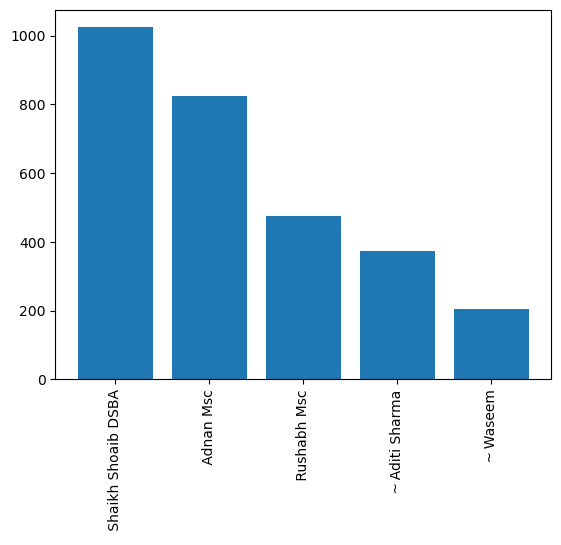

In [31]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [32]:
round((data['user'].value_counts()/data.shape[0])* 100,2).reset_index().rename(columns={'user':'name', 'count':'percent'}) # converting into a dataframe

,name,percent
0,Shaikh Shoaib DSBA,22.94
1,Adnan Msc,18.49
2,Rushabh Msc,10.64
3,~ Aditi Sharma,8.36
4,~ Waseem,4.59
5,~ Smit,4.35
6,~ Shreyas,3.59
7,Vikas Msc,2.64
8,Pragnya Msc,2.42
9,~ ‘ ज३⚡️’,2.40


In [33]:
# Need to remove group notifications
# Need to remove "media omitted messages"
# Need to remove stopwords

In [34]:
# words = []
# for message in data['message']:
#     words.extend(message.split())

In [35]:
temp = data[data['user'] != 'group_notification']
temp = temp[temp['message'] != '<omitted>\n']

In [36]:
# f = open('stop_hinglish.txt','r')
# stop_words = f.read()
# print(stop_words)

with open('stop_hinglish.txt', 'r') as f:
    stop_words = f.read().split()

In [37]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)
#         words.extend(message.split())

In [38]:
from collections import Counter
word_counts = Counter(words)
pd.DataFrame(Counter(words).most_common(20)) # Counter tells the frequency of words

,0,1
0,omitted,493
1,‎,487
2,‎image,242
3,message,135
4,ma'am,119
5,-,114
6,‎sticker,111
7,h,95
8,‎document,80
9,exam,76


In [39]:
print(temp['message'].unique())


['\u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n'
 '\u200e~\u202fAditi Sharma created this group\n'
 '\u200eShaikh Shoaib DSBA added you\n' ... 'Sahi yrr\n'
 'Hack hogaya tha\n' 'Haa 🫠\n']


In [40]:
!pip install emoji

In [41]:
import emoji

emojis = []
for message in data['message']:
    for character in message:
        if emoji.is_emoji(character):
            emojis.append(character)

from collections import Counter
emoji_counts = Counter(emojis)

# Print the most common emojis
print(emoji_counts.most_common())

[('😂', 248), ('🤣', 172), ('💀', 60), ('🥳', 42), ('🥲', 38), ('😭', 36), ('👍', 34), ('🫂', 33), ('🎂', 22), ('🏻', 20), ('🎉', 20), ('😁', 19), ('🗣', 17), ('🙃', 17), ('❤', 16), ('🤦', 16), ('🙏', 15), ('♂', 15), ('🎊', 14), ('😑', 13), ('🗿', 12), ('♀', 12), ('🫡', 12), ('🥰', 12), ('✨', 12), ('🙂', 11), ('👇', 8), ('🫶', 7), ('🥹', 7), ('💪', 5), ('😊', 5), ('🙋', 5), ('😎', 5), ('🫣', 5), ('🫠', 5), ('🍰', 5), ('🤩', 5), ('‼', 5), ('🤔', 4), ('🔥', 4), ('🤝', 4), ('🏏', 4), ('⚽', 4), ('🏃', 4), ('😶', 3), ('💯', 3), ('🍾', 3), ('😔', 3), ('💫', 3), ('😒', 3), ('😬', 3), ('😃', 3), ('😅', 3), ('🙄', 3), ('🤫', 3), ('🥶', 2), ('😮', 2), ('💨', 2), ('✌', 2), ('😍', 2), ('💹', 2), ('☺', 2), ('🥸', 2), ('😌', 2), ('👀', 2), ('🙆', 2), ('🤡', 2), ('🕺', 2), ('👎', 2), ('😦', 2), ('🌝', 2), ('✋', 2), ('💖', 2), ('💕', 2), ('🌻', 2), ('🏆', 2), ('🗓', 2), ('🏅', 2), ('💵', 2), ('💰', 2), ('⚠', 1), ('🧐', 1), ('🚀', 1), ('🥺', 1), ('✊', 1), ('🤐', 1), ('🏔', 1), ('🥂', 1), ('🌟', 1), ('🍽', 1), ('🍹', 1), ('🎭', 1), ('⏰', 1), ('🚨', 1), ('😉', 1), ('😄', 1), ('😈', 1), (

In [42]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,248
1,🤣,172
2,💀,60
3,🥳,42
4,🥲,38
...,...,...
116,🤗,1
117,💗,1
118,🤘,1
119,😡,1


In [43]:
data['month_num'] = data['date'].dt.month

In [44]:
timeline = data.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

In [45]:
timeline

,year,month_num,month,message
0,2023,8,August,338
1,2023,9,September,615
2,2023,10,October,2140
3,2023,11,November,108
4,2023,12,December,343
5,2024,1,January,211
6,2024,2,February,443
7,2024,3,March,265


In [46]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [47]:
timeline['time']= time # In timeline column we add a new col as time

In [48]:
timeline

,year,month_num,month,message,time
0,2023,8,August,338,August-2023
1,2023,9,September,615,September-2023
2,2023,10,October,2140,October-2023
3,2023,11,November,108,November-2023
4,2023,12,December,343,December-2023
5,2024,1,January,211,January-2024
6,2024,2,February,443,February-2024
7,2024,3,March,265,March-2024


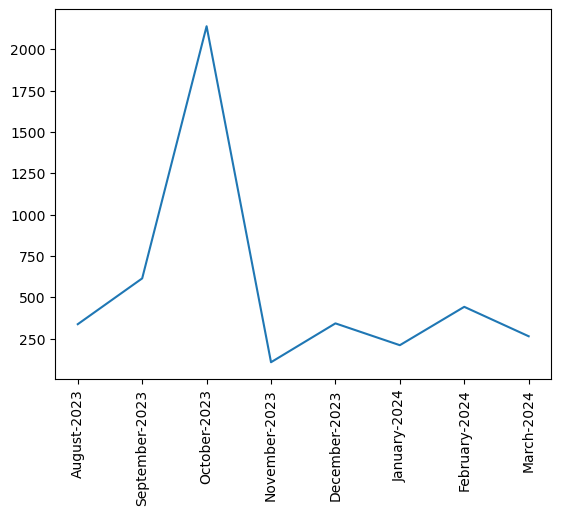

In [49]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [51]:
data['only_date'] = data['date'].dt.date

In [54]:
daily_timeline = data.groupby('only_date').count()['message'].reset_index()

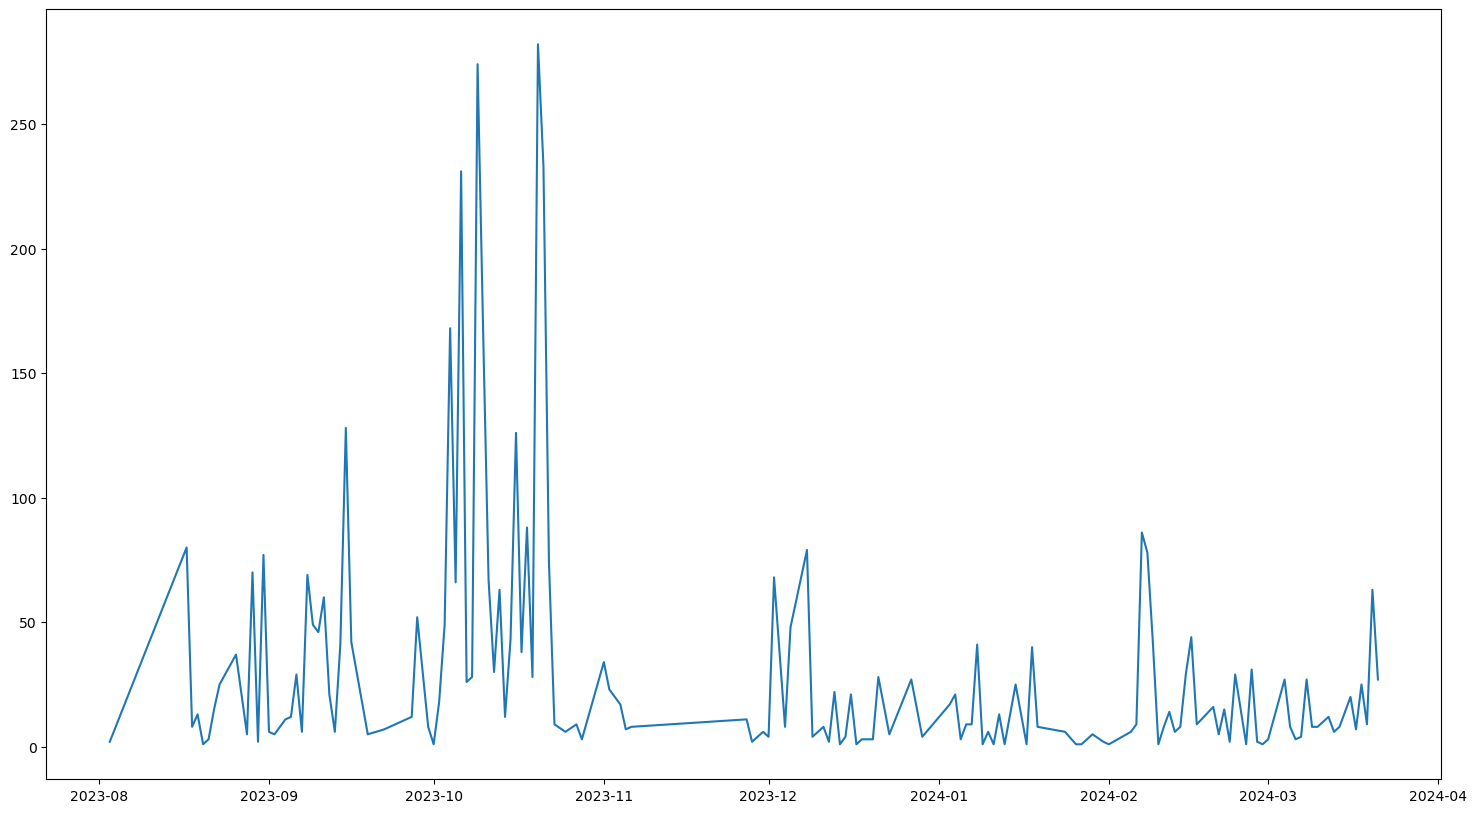

In [58]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [59]:
data.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date
0,2023-08-03 01:23:34,group_notification,,2023,August,3,1,23,8,2023-08-03
1,2023-08-03 01:23:34,Unofficial Group FYMSc 23-24,‎Messages and calls are end-to-end encrypted. ...,2023,August,3,1,23,8,2023-08-03
2,2023-08-17 10:05:18,~ Aditi Sharma,‎~ Aditi Sharma created this group\n,2023,August,17,10,5,8,2023-08-17
3,2023-08-17 10:05:24,Unofficial Group FYMSc 23-24,‎Shaikh Shoaib DSBA added you\n,2023,August,17,10,5,8,2023-08-17
4,2023-08-17 10:08:34,Shaikh Shoaib DSBA,https://statistics.laerd.com/statistical-guide...,2023,August,17,10,8,8,2023-08-17


In [62]:
data['day_name'] = data['date'].dt.day_name()

In [63]:
data['day_name'].value_counts()

day_name
Friday       1037
Wednesday     694
Monday        688
Thursday      665
Saturday      621
Tuesday       525
Sunday        233
Name: count, dtype: int64

In [64]:
data['month'].value_counts()

month
October      2140
September     615
February      443
December      343
August        338
March         265
January       211
November      108
Name: count, dtype: int64

In [65]:
data.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name
0,2023-08-03 01:23:34,group_notification,,2023,August,3,1,23,8,2023-08-03,Thursday
1,2023-08-03 01:23:34,Unofficial Group FYMSc 23-24,‎Messages and calls are end-to-end encrypted. ...,2023,August,3,1,23,8,2023-08-03,Thursday
2,2023-08-17 10:05:18,~ Aditi Sharma,‎~ Aditi Sharma created this group\n,2023,August,17,10,5,8,2023-08-17,Thursday
3,2023-08-17 10:05:24,Unofficial Group FYMSc 23-24,‎Shaikh Shoaib DSBA added you\n,2023,August,17,10,5,8,2023-08-17,Thursday
4,2023-08-17 10:08:34,Shaikh Shoaib DSBA,https://statistics.laerd.com/statistical-guide...,2023,August,17,10,8,8,2023-08-17,Thursday


In [70]:
period = []
for hour in data[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" +str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))

In [71]:
data['period'] = period

In [72]:
data.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
557,2023-09-10 23:36:16,Adnan Msc,Details of the freshers are put up in the group\n,2023,September,10,23,36,9,2023-09-10,Sunday,23-00
3495,2023-12-21 20:46:09,Shaikh Shoaib DSBA,‎This message was deleted.\n,2023,December,21,20,46,12,2023-12-21,Thursday,20-21
3055,2023-10-22 23:21:31,~ Shreyas,Happy birthday to you\n,2023,October,22,23,21,10,2023-10-22,Sunday,23-00
575,2023-09-11 15:58:47,Rushabh Msc,https://forms.gle/STXz3QeKBk6mw9fA9\n,2023,September,11,15,58,9,2023-09-11,Monday,15-16
137,2023-08-23 19:07:34,Adnan Msc,🤣🤣🤣🤣\n,2023,August,23,19,7,8,2023-08-23,Wednesday,19-20


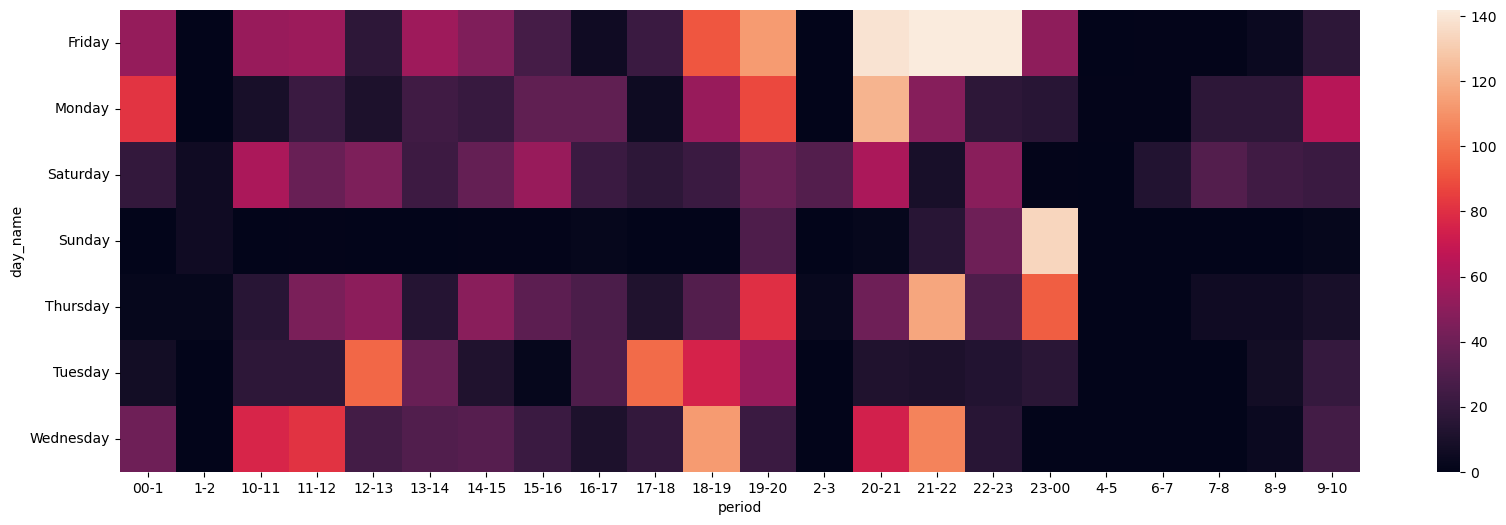

In [73]:
import seaborn as sns

plt.figure(figsize=(20,6))
sns.heatmap(data.pivot_table(index= 'day_name', columns= 'period', values= 'message', aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()

In [74]:
data.pivot_table(index= 'day_name', columns= 'period', values= 'message', aggfunc='count').fillna(0)

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,2-3,20-21,21-22,22-23,23-00,4-5,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,53.0,0.0,54.0,55.0,17.0,56.0,46.0,26.0,6.0,22.0,...,0.0,139.0,142.0,142.0,51.0,0.0,1.0,1.0,4.0,17.0
Monday,82.0,0.0,9.0,22.0,11.0,24.0,21.0,35.0,35.0,5.0,...,0.0,122.0,48.0,17.0,15.0,1.0,1.0,17.0,17.0,64.0
Saturday,19.0,6.0,60.0,38.0,45.0,23.0,37.0,54.0,22.0,17.0,...,31.0,60.0,9.0,49.0,1.0,0.0,13.0,31.0,24.0,22.0
Sunday,0.0,6.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,...,0.0,2.0,15.0,40.0,134.0,0.0,0.0,0.0,0.0,2.0
Thursday,2.0,2.0,15.0,44.0,50.0,14.0,49.0,34.0,28.0,12.0,...,3.0,40.0,117.0,29.0,94.0,0.0,0.0,6.0,6.0,9.0
Tuesday,7.0,0.0,17.0,17.0,97.0,38.0,12.0,2.0,29.0,98.0,...,0.0,12.0,11.0,13.0,16.0,0.0,0.0,0.0,7.0,20.0
Wednesday,40.0,0.0,76.0,81.0,25.0,30.0,32.0,22.0,11.0,19.0,...,0.0,74.0,105.0,15.0,0.0,0.0,0.0,0.0,4.0,25.0
